## Evaluation of MD-IFP on 40 PDB complexes
    
    
### Input data required:
    For running this JN one has to upload and uncompress file "Complete-PDB-Validation-Set.zip"
    it contains 
     (i) directories for each PDB with protoinated PDB structures of a protein, ligand, water, and mol2 file of a ligand
     (ii) Excel file IFPValidation.xlsx with the data from literature used for method validation
     
    
### Packages required:
    numpy
    matplotlib
    pandas
    seaborn
    code is written on Python 3.x and tested on the version 3.7

    
#### Authors: Daria Kokh / Data were generated by  Fabian Ormersbach 
    Daria.Kokh@h-its.org
    Heidelberg Institute of Theoretical Studies (HITS, www.h-its.org)
    Schloss-Wolfsbrunnenweg 35
    69118 Heidelberg, Germany
    
    18.09.2020
    Copyright (c) 2020
    Released under the EUPL Licence, v1.2 or any higher version


## Test on  a complete list of PDBs from the paper

In [ ]:
import os, sys
import pandas as pd
import builtins

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Scripts.Trajectories import *
from Scripts.IFP_generation import *

builtins.SHOULD_SHOW_PLOTS = True

d = "DATA/Fabian-complete-set/Data/"   # directory containing data from  Complete-PDB-Validation-Set.zip 

### 1. Read Data and compute IFPs 

In [15]:
out_list = []
for i,dir_ligand in enumerate(glob.glob(d+"\\*",recursive=False)):
    ligand = os.path.basename(dir_ligand)
    dir_curr = dir_ligand + "\\"+ligand+"_split\\"
    prot = dir_curr +"\\merged.pdb"
    mol2_list = glob.glob(dir_curr+"\\*.mol2",recursive=False)
    print("=====================> ",i,ligand,len(mol2_list)," <==========================")
    if len(mol2_list) > 1:
        ligand_mol2_H = ""
        for m,mm in enumerate(mol2_list):
            if mm.find("swiss") >= 0: 
                ligand_mol2_H = os.path.basename(mm)
                ligand_pdb_H = ligand_mol2_H[:ligand_mol2_H.find("_")]+".pdb"
                break
        if (ligand_mol2_H != ""): print(ligand_mol2_H+" will be used ")
        else: 
            ligand_mol2_H = os.path.basename(mol2_list[0])
            ligand_pdb_H = ligand_mol2_H[:-4]+"pdb"
    elif len(mol2_list) ==  0:
        print(" mol2 files absent:",mol2_list)
        continue
    else:
        ligand_mol2_H = os.path.basename(mol2_list[0])
        ligand_pdb_H = ligand_mol2_H[:-4]+"pdb"
    if  not os.path.exists(dir_curr+"\\"+ligand_mol2_H): 
        print("ligand mol2 missing "+ligand_mol2_H)
        continue
    if  not os.path.exists(dir_curr+"\\"+ligand_pdb_H): 
        print("ligand pdb missing "+ligand_pdb_H)
        continue
    if  not os.path.exists(prot): 
        print("merged pdb missing")
        continue


    complex_pdb_H = "merged.pdb"
    lig_name = ligand_mol2_H[:ligand_mol2_H.find('.')]
    if len(lig_name) > 3: lig_name =lig_name[:3]

    lig = Ligand(dir_curr,ligand_pdb=ligand_pdb_H,ligand_mol2=ligand_mol2_H)
    properties_list = lig.properties_list
    property_list = properties_list

    u = mda.Universe(dir_curr+complex_pdb_H)
    df_prop,df_HB,df_WB = IFP(u,lig_name,properties_list,WB_analysis=True,RE=False)
    df_prop_complete = table_combine(df_HB,df_WB,df_prop,lig_name)
    out_list.append([ligand,lig_name,df_prop_complete.columns.values])
    print(lig_name,df_prop_complete.columns.values)    

=====================>  0 1bju 3  <==========================
GP6_swissparam.mol2 will be used 
Atoms found in the MOL2 file:  ['N1', 'N2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'N3', 'C8', 'O1', 'N4', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'CL', 'H3', 'H4', 'H6', 'H7', 'HN3', 'HN4', 'H10', 'H11', 'H13', 'H14', 'H12', 'H15', 'H21', 'H22']
...............Ligand properties:................
Donor ['N1', 'N2', 'N3', 'N4']
Acceptor ['O1']
PosIonizable ['N1']
Aromatic ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C9', 'C14', 'C13', 'C12', 'C11', 'C10']
Hydrophobe ['C2', 'C3', 'C4', 'C6', 'C7', 'C10', 'C11', 'C12', 'C13', 'C14']
LumpedHydrophobe ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C9', 'C14', 'C13', 'C12', 'C11', 'C10']
............Important! ........
The following residue names will be used to identify ligand in the PDB file:  ['GP6']
Start HB analysis 08:54:00.775697
Start WB analysis 08:54:01.517273
Start collecting IFPs:  08:54:02.990428
Start building IFP table:  08:54:03.787779
IFP data

Start collecting IFPs:  08:54:34.266234
Start building IFP table:  08:54:35.593494
IFP database is ready  08:54:35.597492
TQ3 ['time' 'HA_ILE9' 'HA_VAL10' 'HY_MET25' 'HA_GLU32' 'IP_GLU32' 'HY_ILE33'
 'AR_PHE36' 'HY_PHE36' 'HY_THR58' 'HY_ILE62' 'HA_ILE112' 'HA_TYR118'
 'HA_THR133' 'WAT']
=====================>  7 1ig3 1  <==========================
Atoms found in the MOL2 file:  ['CM2', 'N4A', 'CM4', 'O1', 'C7', 'C6', 'C2', 'S1', 'C5', 'C4', 'N3', 'C7A', 'C4A', 'N3A', 'C2A', 'N1A', 'C6A', 'C5A', 'H72', 'H73', 'H62', 'H63', 'H2', 'H7A2', 'H7A3', 'H6A', 'H1', 'H4A1', 'H4A2', 'HM21', 'HM22', 'HM23', 'HM41', 'HM42', 'HM43']
...............Ligand properties:................
Donor ['N4A', 'O1']
Acceptor ['O1', 'N3A', 'N1A']
PosIonizable ['N3']
Aromatic ['C2', 'S1', 'C5', 'C4', 'N3', 'C4A', 'N3A', 'C2A', 'N1A', 'C6A', 'C5A']
Hydrophobe ['CM2', 'CM4', 'C6', 'C5', 'C5A']
............Important! ........
The following residue names will be used to identify ligand in the PDB file:  ['VIB']
Start HB

Start HB analysis 08:54:57.677673
Start WB analysis 08:54:57.932435
Start collecting IFPs:  08:54:58.683314
Start building IFP table:  08:54:59.583606
IFP database is ready  08:54:59.585603
IH5 ['time' 'HY_PHE272' 'HY_THR273' 'HY_ILE276' 'HY_ALA279' 'WB_ALA279'
 'HD_ARG282' 'IN_ARG282' 'HY_MET310' 'HY_MET313' 'WB_ARG316' 'HY_ALA317'
 'HY_LEU330' 'HD_ASN331' 'HY_LEU346' 'HA_HIS435' 'AR_HIS435' 'HY_HIS435'
 'HY_PHE455' 'WAT']
=====================>  15 1oq5 1  <==========================
Atoms found in the MOL2 file:  ['S1', 'C15', 'C14', 'C13', 'C12', 'C17', 'C16', 'N2', 'C3', 'C5', 'C10', 'C9', 'C8', 'C11', 'C7', 'C6', 'C2', 'C1', 'C4', 'F3', 'F2', 'F1', 'N1', 'N3', 'O2', 'O1', 'H14', 'H13', 'H17', 'H16', 'H10', 'H9', 'H7', 'H6', 'H2', 'H3', 'H111', 'H112', 'H113']
 Fluorine atoms are found (will be considered as Hydrophobe): ['F3', 'F2', 'F1']
...............Ligand properties:................
Acceptor ['N1', 'O2', 'O1']
Aromatic ['N2', 'C3', 'C2', 'C1', 'N1', 'C15', 'C14', 'C13', 'C12

Start HB analysis 08:55:11.711236
Start WB analysis 08:55:11.885171
Start collecting IFPs:  08:55:12.911426
Start building IFP table:  08:55:13.489587
IFP database is ready  08:55:13.492608
A15 ['time' 'HY_THR24' 'HA_GLU84' 'AR_TRP85' 'HY_TRP85' 'WB_ASP103'
 'HA_HIS106' 'HD_HIS106' 'HA_VAL316' 'HY_VAL316' 'WAT']
=====================>  23 1tt1 1  <==========================
Atoms found in the MOL2 file:  ['N', 'CD', 'CD1', 'CD2', 'CA', 'CB', 'CB1', 'CG', 'CG1', 'CG2', 'C', 'O', 'OD1', 'OD2', 'OXT', 'H2', 'H3', 'HD2', 'HD3', 'HA', 'HB', 'HB12', 'HB13', 'HG', 'HD11', 'HD12', 'HD21', 'HD22', 'HD23']
...............Ligand properties:................
Donor ['N']
Acceptor ['OD2', 'OXT']
NegIonizable ['CG1', 'OD2', 'OD1', 'C', 'OXT', 'O']
PosIonizable ['N']
ZnBinder ['CA', 'C', 'OXT', 'O', 'CB1', 'CG1', 'OD2', 'OD1']
Hydrophobe ['CD1', 'CD2', 'CB', 'CB1', 'CG', 'CG2']
............Important! ........
The following residue names will be used to identify ligand in the PDB file:  ['KAI']
Start HB

Start collecting IFPs:  08:55:23.952647
Start building IFP table:  08:55:24.230498
IFP database is ready  08:55:24.233493
CHT ['time' 'AR_TRP43' 'AR_TRP90' 'AR_TYR119' 'HD_TYR119' 'HD_ASN156'
 'HA_ASP157' 'AR_TRP205']
=====================>  30 2w0s 1  <==========================
Atoms found in the MOL2 file:  ['O3*', 'C3*', 'C2*', 'C1*', 'O4*', 'C4*', 'C5*', 'O5*', 'P', 'O1P', 'O2P', 'O3P', 'N1', 'C6', 'C5', 'C5A', 'C5B', 'BR', 'C4', 'O4', 'N3', 'C2', 'O2', 'H3*', 'H2*', 'H2**', 'H1*', 'H4*', 'H5*', 'H5**', 'H6', 'H5A', 'H5B2', 'H5B3', 'H3', 'HO3*']
ERROR:  RDKit cannot read MOL2 structure None
ERROR:   RDKit cannot generate ligand property list
............Important! ........
The following residue names will be used to identify ligand in the PDB file:  []
Start HB analysis 08:55:24.415390
Start WB analysis 08:55:24.542864
Start collecting IFPs:  08:55:24.576844
HY failed
IP failed
IN failed
AR1 failed
AR3 failed
Start building IFP table:  08:55:24.672789
IFP database is ready  08:55:

Start HB analysis 08:55:32.083164
Start WB analysis 08:55:32.160100
Start collecting IFPs:  08:55:32.346995
Start building IFP table:  08:55:32.446955
IFP database is ready  08:55:32.448955
GR6 ['time' 'HY_LEU123' 'HA_ASP125' 'HY_ALA128' 'HD_ASP129' 'HD_ASP130'
 'HY_VAL132' 'HD_ILE150' 'HY_ILE150' 'HY_PRO181' 'HY_VAL182' 'HY_ILE184'
 'WAT']
=====================>  37 3O1H 1  <==========================
Atoms found in the MOL2 file:  ['CAA', 'NAC', 'CAD', 'CAB', 'OAE', 'HAB1', 'HAB2', 'HAB3', 'HAD1', 'HAD2', 'HAD3', 'HAA1', 'HAA2', 'HAA3']
ERROR:   RDKit cannot generate ligand property list
............Important! ........
The following residue names will be used to identify ligand in the PDB file:  ['TMO']
Start HB analysis 08:55:32.621835
Start WB analysis 08:55:32.708786
Start collecting IFPs:  08:55:32.761754
HY failed
IP failed
IN failed
AR1 failed
AR3 failed
Start building IFP table:  08:55:32.879708
IFP database is ready  08:55:32.880690
TMO ['time' 'WAT']
=====================>  

Start HB analysis 08:55:42.960723
Start WB analysis 08:55:43.062683
Start collecting IFPs:  08:55:43.632358
Start building IFP table:  08:55:43.922191
IFP database is ready  08:55:43.924186
BGO ['time' 'WB_GLY8' 'WB_ASN9' 'HD_ALA11' 'HD_SER12' 'HD_GLY13' 'HD_LYS14'
 'HD_THR15' 'HD_SER16' 'WB_SER16' 'WB_GLY56' 'HD_ASN113' 'HD_MET114'
 'HA_ASP116' 'IP_ASP116' 'HA_SER142' 'HD_ALA143' 'HD_LEU144' 'WAT']
=====================>  44 4alw 1  <==========================
Atoms found in the MOL2 file:  ['C5', 'C6', 'N3', 'C7', 'C8', 'C9', 'N2', 'C4', 'C3', 'N4', 'C10', 'C11', 'C12', 'C13', 'BR1', 'C14', 'C15', 'C16', 'O2', 'C1', 'C2', 'O1', 'N1', 'H52', 'H53', 'H62', 'H63', 'H3', 'H82', 'H83', 'H92', 'H93', 'H2', 'H42', 'H43', 'H12', 'H14', 'H15', 'H1', 'H71', 'H72', 'H73']
...............Ligand properties:................
Donor ['N3', 'N2', 'N4', 'N1']
Acceptor ['N4', 'O1']
PosIonizable ['N3', 'N2']
Aromatic ['C10', 'C11', 'C16', 'O2', 'C1', 'C3', 'N4', 'C10', 'C1', 'C2', 'N1', 'C11', 'C12', 'C1

### 2. Read table with data from literature:
    1. FLIP: Hajiebrahimi, A., Ghasemi, Y., and Sakhteman, A. (2017).FLIP: An assisting software in structure based drug design using fingerprint of protein-ligand interaction. Journal of molecular graphics & modelling 78, 234-244.  
    2. PLIP: Salentin, S., Schreiber, S., Haupt, V.J., Adasme, M.F., and Schroeder, M. (2015). PLIP: fully automated protein-ligand interaction profiler. Nucleic acids research 43, W443-7.
    3. LPC: Sobolev V., Sorokine A., Prilusky J., Abola E.E. and Edelman M. (1999)  Automated analysis of interatomic contacts in proteins. Bioinformatics, 15, 327-332
    4. MOE: Molecular Operating Environment, https://www.chemcomp.com/MOE-Molecular_Operating_Environment.htm (2017)
    
##### Excel file :
    PDB, LIG - PDB ID and ligand name
    IFP - IFPs found by MD-IFP (the version v1.0) 
    FLIP/PLIP/LPC/MOE - "X" if interaction appears in the corresponding paper
    -------------------------------
    Round brackets in the LPC column and around LPC in the missing interactions column indicate that LPC does not explicitly find salt-bridges, instead merging them into hydrogenbonds. Waterbridges and halogen bonds are not considered in LPC at all.
    Round brackets in the FLIP column and around FLIP in the missing interactions column indicate that the interaction was reported as"LITERATURE AND NOT FLIP", while square brackets indicate "FLIP AND NOT LITERATURE". 
    --------------------------------
    ADD_1/ADD_11 and ADD_2/ADD_21 - contain IFPs that were not found by MD-IFP (the version v1.0) 
    methods found these IFPs are listed in columns ADD_11 and ADD_21
    if WB found by 3 methods or other interactions by 4  methods additionally "fn" is added (i.e. this bond will be considered as FN if MD-IFP does not find it)

In [16]:
literature = pd.read_excel(d +"IFPValidation.xlsx",header = 0)
literature['MD-IFP'] ="-"
literature


,n,PDB,LIG,IFP,FLIP,PLIP,LPC,MOE,ADD_1,ADD_11,ADD_2,ADD_21,MD-IFP
0,1,1bju,GP6-A,AR_HIS57,X,X,X,X,HB_TYR228,FLIP,HB_GLN192,LPC,-
1,1,1bju,GP6-A,HA_ASP189,X,X,X,X,WB_TRP215,FLIP,HB_GLY216,LPC,-
2,1,1bju,GP6-A,HA_GLY219,X,NaN,X,X,WB_TYR228,FLIP,HB_SER217,LPC,-
3,1,1bju,GP6-A,HA_SER190,X,NaN,X,X,WB_SER190,PLIP,HB_LYS224,LPC,-
4,1,1bju,GP6-A,HA_SER195,X,X,X,NaN,HB_HIS57,LPC,HB_PRO225,LPC,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,44,4rdl,FUC-A,HA_ASN395,X,X,NaN,NaN,HB_HIS334,"FLIP, PLIP, LPC,MOE, fn",IN_HIS334,"PLIP, (LPC)",-
310,44,4rdl,FUC-A,WB_ASN395,X,X,NaN,NaN,HB_THR347,"(FLIP), PLIP",NaN,NaN,-
311,44,4rdl,FUC-A,WB_VAL442,NaN,NaN,NaN,NaN,HB_GLY348,"(FLIP), PLIP",NaN,NaN,-
312,44,4rdl,FUC-A,WB_SER443,NaN,NaN,NaN,NaN,HB_ASP349,"PLIP, LPC",NaN,NaN,-


### Compare MD-IFPs with literature 

    Interactions are considered false positives (FP) if no other method (FLIP, PLIP, LPC, MOE) was able to find them and 
    false negative (FN) if all four (three for water bridges and halogen bonds) found the missing interaction.
    Interactions are considered true positives (TP) if at least one method (FLIP, PLIP, LPC, MOE) was able to find it

In [17]:
print(len(out_list),literature.PDB.unique().shape)

IFP_dict = {"AR": 0,"IP": 1,"IN": 1,"HD":2,"HA":2,"HB":2,"WB":3,"HL":4}
print(IFP_dict["AR"])
TP_list = [[],[],[],[],[]]
FP_list = [[],[],[],[],[]]
FN_list = [[],[],[],[],[]]
for l in out_list:
    print("-----------------",l[0],"--------------------")
    lit = literature[literature.PDB == l[0]]
    lit_FN = np.concatenate((np.array(lit[lit.ADD_11.str.find('fn') > 0 ].ADD_1.values),np.array(lit[lit.ADD_21.str.find('fn') > 0 ].ADD_2.values)))
    if lit.shape[0] == 0: continue
    TP = []
    FP = []
    FN = []
    for ifp in l[2][1:-1] :
#        print(l[0],l[1],lit.shape[0],ifp)
        if ifp[:2] == 'HY': continue
        ind = IFP_dict[ifp[:2]]
        if ifp  in lit.IFP.values:
            if (lit[lit.IFP == ifp].FLIP.values[0] in ["X","(X)","[X]"])  or (lit[lit.IFP == ifp].PLIP.values[0] in ["X","(X)","[X]"]) \
            or (lit[lit.IFP == ifp].LPC.values[0]  in ["X","(X)","[X]"]) or (lit[lit.IFP == ifp].MOE.values[0] == "X"):
                TP.append(ifp)
                TP_list[ind].append([l[0],l[1],ifp])
                literature.loc[literature.IFP == ifp,"MD-IFP"] = "X"
            else:
                FP.append(ifp)
                FP_list[ind].append([l[0],l[1],ifp])
        else:
            if (ifp in lit.ADD_1.values) or (ifp in lit.ADD_2.values) :
                TP.append(ifp)
                TP_list[ind].append([l[0],l[1],ifp])
            else:
                FP.append(ifp)
                FP_list[ind].append([l[0],l[1],ifp])
    print(lit_FN)
    for fn in lit_FN[lit_FN == lit_FN]:
        ind = IFP_dict[fn[:2]]
        if (fn in l[2][1:-1]) and (not fn in TP) and (not fn in FP):
            FP.append(fn)
            FP_list[ind].append([l[0],l[1],fn])
        else:
            FN.append(fn)
            FN_list[ind].append([l[0],l[1],fn])
            
            
    print("TP: ",TP)    
    print("FP: ",FP)    
    print("FN: ",FN)           

48 (40,)
0
----------------- 1bju --------------------
[]
TP:  ['AR_HIS57', 'HA_ASP189', 'IP_ASP189', 'HA_SER190', 'HA_SER195', 'HA_GLY219']
FP:  []
FN:  []
----------------- 1bma --------------------
['HB_GLN200']
TP:  ['HA_HIS60', 'HA_SER203', 'HA_SER222', 'AR_PHE223', 'HA_VAL224', 'HD_VAL224']
FP:  []
FN:  ['HB_GLN200']
----------------- 1eve --------------------
[]
TP:  ['AR_TRP84', 'WB_TYR121', 'AR_TRP279', 'HD_PHE288', 'AR_PHE330']
FP:  ['WB_PHE331']
FN:  []
----------------- 1hvy --------------------
[]
TP:  ['WB_ARG50', 'IN_LYS77', 'WB_LYS77', 'WB_LYS107', 'AR_TRP109', 'HD_GLY222', 'AR_PHE225', 'WB_MET309']
FP:  ['WB_ARG78', 'WB_GLY105', 'WB_ILE307']
FN:  []
----------------- 1hwi --------------------
[]
TP:  ['AR_ARG590', 'HD_ARG590', 'IN_ARG590', 'HD_SER684', 'HA_ASP690', 'WB_ASP690', 'HD_LYS691', 'IN_LYS692']
FP:  []
FN:  []
----------------- 1ia1 --------------------
[]
TP:  ['HA_ILE9', 'HA_VAL10', 'HA_GLU32', 'IP_GLU32', 'AR_PHE36', 'HA_ILE112', 'HA_TYR118', 'HA_THR133']
F

#####  4. Priveous results: comparison with literature

####  MD-IFP version 1.0; Fabian's simulations  (Kokh et al. JCP 2020) :
      Total interactions found:    False positives:	 False negatives:
        AR	56                  |             3     |              0
		IP	32                  |             0     |              1
		HB	159                 |             2     |              5
		WB	69                  |             23    |              4
		HL	3                   |             0     |              0
        ------------------------  ------------------  ------------------
        Total	319                    Total  28            Total  10

####  MD-IFP version 1.1 (present script ):
      procedure for detection of aromatic interactions revised (several bugs fixed):
      - CG* aromatic atoms missed 
      - cation-aromatic and aromatic-aromatic were mixed out
      - prot.-ligand and ligand - protein dist. 5.5 A
      - ligand S - aromatic residue interaction removed
      - in adding contacts thet were not counted - (< 4) updated to (<= 4)
      
      Total interactions found:    False positives:	 False negatives:
        AR	55                  |             3     |              0
		IP	31                  |             0     |              1
		HB	148                 |             2     |              5
		WB	63                  |             23    |              4
		HL	3                   |             0     |              0
        ------------------------  ------------------  ------------------
        Total	319                    Total  28            Total  10
			

### 5. Current results: comparison with literature 

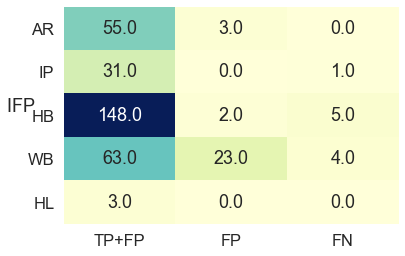

In [18]:
matrix = np.zeros((5,3),dtype = int)
sns.set(font_scale=1.5)
for i in range (0,5): matrix [i,0] = len(TP_list[i])+len(FP_list[i])
for i in range (0,5): matrix [i,1] = len(FP_list[i])
for i in range (0,5): matrix [i,2] = len(FN_list[i])
heat_map = sns.heatmap(matrix, annot=True,cmap="YlGnBu", cbar=False,vmax=np.amax(matrix), fmt='.1f')
heat_map.set_xticklabels(["TP+FP","FP","FN"], rotation=0)
heat_map.set_yticklabels(["AR","IP","HB","WB","HL"], rotation=0)
plt.xlabel('')
plt.ylabel('IFP ', rotation=0)
plt.show()


### 5. Get a list of  all FPs 

In [19]:
print("AR: ",FP_list[0])
print("IP: ",FP_list[1])
print("HB: ",FP_list[2])
print("WB: ",FP_list[3])
print("HL: ",FP_list[4])

AR:  [['1p62', 'GEO', 'AR_TRP58'], ['1p62', 'GEO', 'AR_PHE96'], ['2gpu', 'OHT', 'AR_TYR326']]
IP:  []
HB:  [['3shy', '5FO', 'HD_TYR612'], ['3tah', 'BGO', 'HA_SER142']]
WB:  [['1eve', 'E20', 'WB_PHE331'], ['1hvy', 'D16', 'WB_ARG78'], ['1hvy', 'D16', 'WB_GLY105'], ['1hvy', 'D16', 'WB_ILE307'], ['1jd0', 'AZM', 'WB_PRO201'], ['1l7f', 'BCZ', 'WB_THR225'], ['1oyt', 'FSN', 'WB_HIS57'], ['1p5e', 'TBS', 'WB_GLU51'], ['1p62', 'GEO', 'WB_ALA31'], ['1tsl', 'A15', 'WB_ASP103'], ['1xdn', 'ATP', 'WB_GLU60'], ['2gpu', 'OHT', 'WB_GLU275'], ['2zoz', 'ET', 'WB_GLU96'], ['3g2k', 'SKY', 'WB_GLU88'], ['3g2k', 'SKY', 'WB_HIS377'], ['3g2k', 'SKY', 'WB_THR671'], ['3r0t', 'FU9', 'WB_GLU81'], ['3r0t', 'FU9', 'WB_HIS160'], ['3tah', 'BGO', 'WB_GLY8'], ['3tah', 'BGO', 'WB_GLY56'], ['4alw', 'HY7', 'WB_SER46'], ['4rdl', 'FUC', 'WB_VAL442'], ['4rdl', 'FUC', 'WB_SER443']]
HL:  []


### 6. Get a list of  all FNs

In [20]:
print("AR: ",FN_list[0])
print("IP: ",FN_list[1])
print("HB: ",FN_list[2])
print("WB: ",FN_list[3])
print("HL: ",FN_list[4])

AR:  []
IP:  [['1osn', 'BVP', 'IN_LYS25']]
HB:  [['1bma', '0QH', 'HB_GLN200'], ['1ig3', 'VIB', 'HB_GLN116'], ['1oyt', 'FSN', 'HB_ALA190'], ['3srr', 'Q20', 'HB_ALA8'], ['4rdl', 'FUC', 'HB_HIS334']]
WB:  [['1nax', 'IH5', 'WB_ARG320'], ['1osn', 'BVP', 'WB_ARG143'], ['3g2k', 'SKY', 'WB_THR676'], ['3g2k', 'SKY', 'WB_ALA673']]
HL:  []


### 7. Get a lit of  N  that were P in the version 1.0 

In [21]:
for ifp  in literature.IFP:
    lit = literature[literature.IFP == ifp]
    if lit.shape[0] > 0:
        if (lit.FLIP.values[0] in ["X","(X)","[X]"])  or (lit.PLIP.values[0] in ["X","(X)","[X]"]) \
            or (lit.LPC.values[0]  in ["X","(X)","[X]"]) or (lit.MOE.values[0] == "X"):
            if lit["MD-IFP"].values[0] == '-':
                print("FN: ",lit.PDB.values[0],ifp)

FN:  2reg AR_TRP205
FN:  2yxj HD_GLY138
FN:  4alw AR_PHE49
FN:  4kya HA_ALA609
